In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [2]:
# Importing the Libraries¶

import xgboost as xgb
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression

from sklearn.linear_model import Ridge

import matplotlib.pyplot as plt

from sklearn.model_selection import KFold
import warnings
warnings.filterwarnings('ignore')

from sklearn.ensemble import RandomForestRegressor

from sklearn.preprocessing import OneHotEncoder

from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from scipy import stats

In [3]:
#wh17 = pd.read_csv('../input/world-happiness/2017.csv')

os.chdir("../soheil")


wh17 = pd.read_csv('2017.csv')

In [4]:
wh17.head()

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001AC14100908>,
      dtype=object)

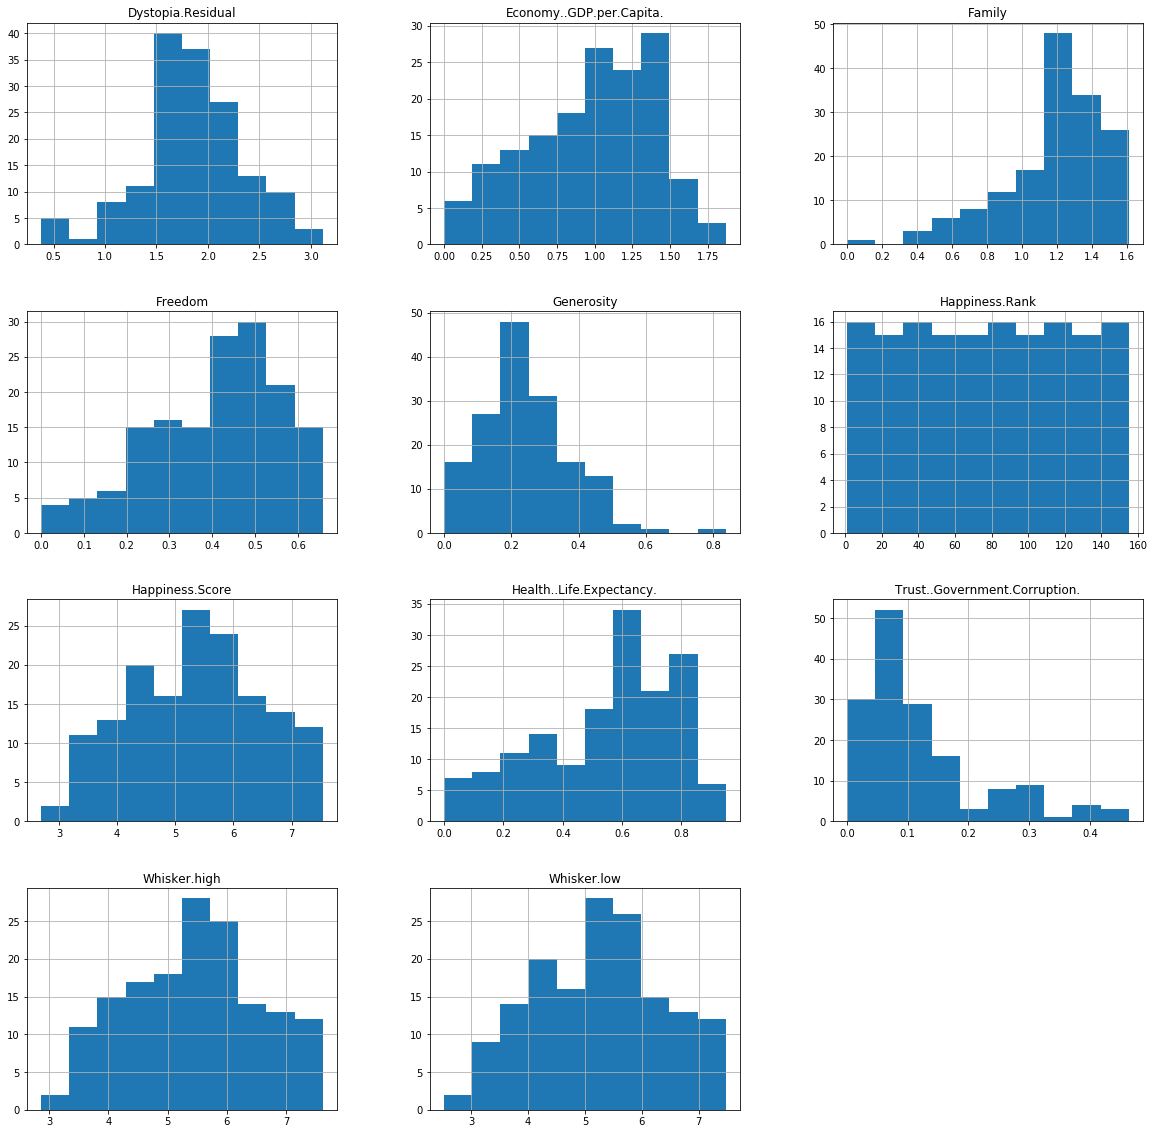

In [5]:

wh17.hist(figsize=(20,20))

In [6]:
wh17.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 12 columns):
Country                          155 non-null object
Happiness.Rank                   155 non-null int64
Happiness.Score                  155 non-null float64
Whisker.high                     155 non-null float64
Whisker.low                      155 non-null float64
Economy..GDP.per.Capita.         155 non-null float64
Family                           155 non-null float64
Health..Life.Expectancy.         155 non-null float64
Freedom                          155 non-null float64
Generosity                       155 non-null float64
Trust..Government.Corruption.    155 non-null float64
Dystopia.Residual                155 non-null float64
dtypes: float64(10), int64(1), object(1)
memory usage: 14.6+ KB


In [7]:
wh17.describe()

,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
count,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000
mean,78.000000,5.354019,5.452326,5.255713,0.984718,1.188898,0.551341,0.408786,0.246883,0.123120,1.850238
std,44.888751,1.131230,1.118542,1.145030,0.420793,0.287263,0.237073,0.149997,0.134780,0.101661,0.500028
min,1.000000,2.693000,2.864884,2.521116,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.377914
25%,39.500000,4.505500,4.608172,4.374955,0.663371,1.042635,0.369866,0.303677,0.154106,0.057271,1.591291
50%,78.000000,5.279000,5.370032,5.193152,1.064578,1.253918,0.606042,0.437454,0.231538,0.089848,1.832910
75%,116.500000,6.101500,6.194600,6.006527,1.318027,1.414316,0.723008,0.516561,0.323762,0.153296,2.144654
max,155.000000,7.537000,7.622030,7.479556,1.870766,1.610574,0.949492,0.658249,0.838075,0.464308,3.117485


0.009553789803284616


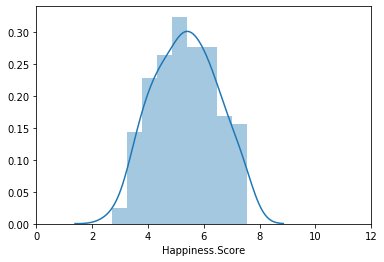

In [8]:
plt.xlim(0,12)

sns.distplot((wh17['Happiness.Score']))
print((wh17['Happiness.Score']).skew())

In [9]:
np.max(wh17['Happiness.Score'])

7.537000179290769

In [10]:
wh17.corr()['Happiness.Score']

Happiness.Rank                  -0.992774
Happiness.Score                  1.000000
Whisker.high                     0.999497
Whisker.low                      0.999520
Economy..GDP.per.Capita.         0.812469
Family                           0.752737
Health..Life.Expectancy.         0.781951
Freedom                          0.570137
Generosity                       0.155256
Trust..Government.Corruption.    0.429080
Dystopia.Residual                0.475355
Name: Happiness.Score, dtype: float64

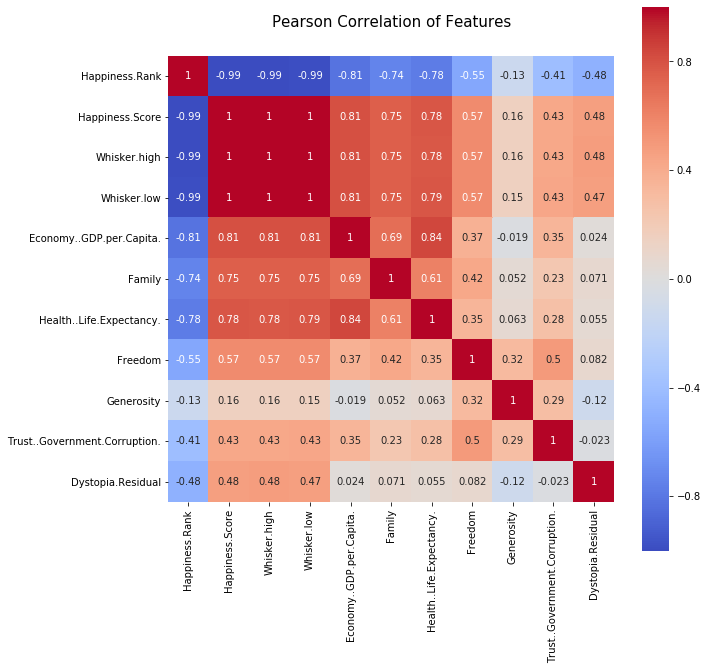

In [11]:
#Correlation Matrix
fig = plt.figure(figsize=[10,10])
plt.title('Pearson Correlation of Features', y=1.05, size=15)

sns.heatmap(wh17.corr(), annot = True, square=True,linecolor='white',cmap='coolwarm', vmin=-1, vmax= 1)

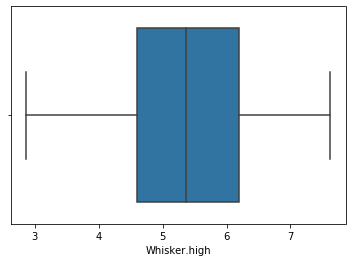

In [12]:
sns.boxplot(x = 'Whisker.high',data=wh17)

In [13]:
wh17.columns

Index(['Country', 'Happiness.Rank', 'Happiness.Score', 'Whisker.high',
       'Whisker.low', 'Economy..GDP.per.Capita.', 'Family',
       'Health..Life.Expectancy.', 'Freedom', 'Generosity',
       'Trust..Government.Corruption.', 'Dystopia.Residual'],
      dtype='object')

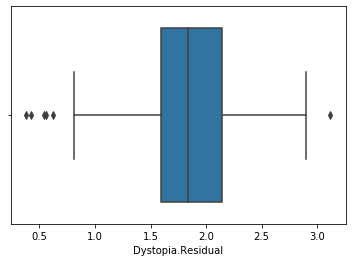

In [14]:
sns.boxplot(x = 'Dystopia.Residual',data=wh17)

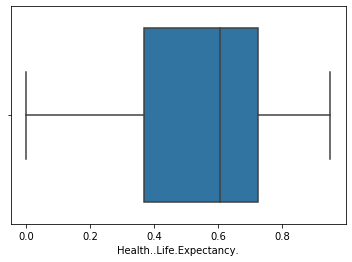

In [15]:
sns.boxplot(x = 'Health..Life.Expectancy.',data=wh17)

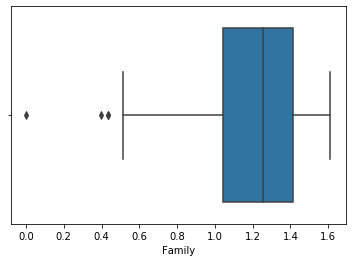

In [16]:
sns.boxplot(x = 'Family',data=wh17)

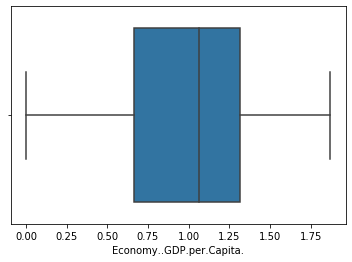

In [17]:
sns.boxplot(x = 'Economy..GDP.per.Capita.',data=wh17)

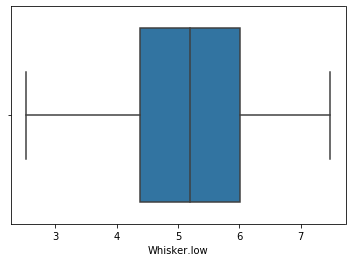

In [18]:
sns.boxplot(x = 'Whisker.low',data=wh17)

In [19]:
wh17.columns

Index(['Country', 'Happiness.Rank', 'Happiness.Score', 'Whisker.high',
       'Whisker.low', 'Economy..GDP.per.Capita.', 'Family',
       'Health..Life.Expectancy.', 'Freedom', 'Generosity',
       'Trust..Government.Corruption.', 'Dystopia.Residual'],
      dtype='object')

In [20]:
wh17.corr()['Happiness.Score']

Happiness.Rank                  -0.992774
Happiness.Score                  1.000000
Whisker.high                     0.999497
Whisker.low                      0.999520
Economy..GDP.per.Capita.         0.812469
Family                           0.752737
Health..Life.Expectancy.         0.781951
Freedom                          0.570137
Generosity                       0.155256
Trust..Government.Corruption.    0.429080
Dystopia.Residual                0.475355
Name: Happiness.Score, dtype: float64

In [21]:
wh17.drop(columns = ['Country','Happiness.Rank','Whisker.low'], inplace = True)

In [22]:
wh17.columns

Index(['Happiness.Score', 'Whisker.high', 'Economy..GDP.per.Capita.', 'Family',
       'Health..Life.Expectancy.', 'Freedom', 'Generosity',
       'Trust..Government.Corruption.', 'Dystopia.Residual'],
      dtype='object')

In [23]:
wh17.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 9 columns):
Happiness.Score                  155 non-null float64
Whisker.high                     155 non-null float64
Economy..GDP.per.Capita.         155 non-null float64
Family                           155 non-null float64
Health..Life.Expectancy.         155 non-null float64
Freedom                          155 non-null float64
Generosity                       155 non-null float64
Trust..Government.Corruption.    155 non-null float64
Dystopia.Residual                155 non-null float64
dtypes: float64(9)
memory usage: 11.0 KB


In [24]:
y = wh17['Happiness.Score']

In [25]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_new = scaler.fit_transform(wh17.drop(columns = 'Happiness.Score'))

In [26]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor
selector = SelectFromModel(estimator=RandomForestRegressor(n_jobs=-1, n_estimators=100)).fit(X_new, y)
X_new = selector.transform(X_new)

In [27]:
X_new = pd.DataFrame(data= X_new)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(
    X_new, y, test_size=0.33, random_state=42)

In [29]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X_train, y_train)
regressor.score(X_test, y_test)

0.9966304452544575

In [30]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=8)
neigh.fit(X_train, y_train)
neigh.score(X_test, y_test)

0.9931439806877922

In [31]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X_train, y_train)
reg.score(X_test, y_test)

0.9988439133625598

In [32]:
reg.score(X_train, y_train)

0.9990550666457757